In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch import arch_model
import matplotlib.pyplot as plt
import sys
import scipy as sp
import matplotlib.pyplot as plt
# import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
%matplotlib inline

In [2]:
sales_df=pd.read_csv("Project2/Project_2/Notebook/sales_promo_data_19_20.csv", parse_dates=True)

In [3]:
sales_df.tail()

,Category,5-Jan-19,12-Jan-19,19-Jan-19,26-Jan-19,2-Feb-19,9-Feb-19,16-Feb-19,23-Feb-19,2-Mar-19,...,27-Jun-20,4-Jul-20,11-Jul-20,18-Jul-20,25-Jul-20,1-Aug-20,8-Aug-20,15-Aug-20,22-Aug-20,29-Aug-20
15,shaving_promo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,Sunscreen,1661749,1434750,1423463,1366366,1496036,1838132,2138131,2443552,2793423,...,10271589,11106721,9383774,8412377,7211073,6410886,5008472,5074913,4078391,3295517
17,sunscreen_promo,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,1,1,1,1
18,Tanner,84682,78632,81813,82477,89832,104680,109791,111713,125240,...,217349,226920,187838,175613,160136,152533,133586,130342,119494,111080
19,tanner_promo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
sales_df=sales_df.rename(columns={"Category":"Date"})

In [5]:
sales_df.index = pd.to_datetime(sales_df.index)

In [6]:
sales_df=sales_df.T

In [7]:
sales_df.columns= sales_df.iloc[0]

In [8]:
sales_df=sales_df.iloc[1:,:]
sales_df.head()

Date,Acne,acne_promo,Baby,baby_promo,Bath,bath_promo,Body Wash,body_promo,Hair,hair_promo,Lotion,lotion_promo,Makeup,makeup_promo,Shaving,shaving_promo,Sunscreen,sunscreen_promo,Tanner,tanner_promo
5-Jan-19,14969813,0,1417338,0,55558,0,1491216,0,929666,0,3227827,0,7156661,0,273010,0,1661749,0,84682,0
12-Jan-19,15488855,0,1515492,0,59528,0,1599429,0,1042393,0,3551875,0,7188663,0,283501,0,1434750,0,78632,0
19-Jan-19,15522357,0,1562793,0,56189,0,1409114,0,1048880,0,3435812,0,7173238,0,266646,0,1423463,0,81813,0
26-Jan-19,15054219,0,1555259,0,56073,0,1387046,0,1104388,0,3406859,0,6851425,0,264479,0,1366366,0,82477,0
2-Feb-19,14585357,0,1638797,0,60760,0,1479577,0,1235337,0,3754491,0,6745738,0,265783,0,1496036,0,89832,0


In [9]:
sales_df.index = pd.to_datetime(sales_df.index)

In [10]:
acne_df= sales_df[["Acne","acne_promo"]]
baby_df= sales_df[["Baby","baby_promo"]]
bath_df= sales_df[["Bath","bath_promo"]]
body_df= sales_df[["Body Wash","body_promo"]]
hair_df= sales_df[["Hair","hair_promo"]]
lotion_df= sales_df[["Lotion","lotion_promo"]]
makeup_df= sales_df[["Makeup","makeup_promo"]]
shaving_df= sales_df[["Shaving","shaving_promo"]]
sunscreen_df= sales_df[["Sunscreen","sunscreen_promo"]]
tanner_df= sales_df[["Tanner","tanner_promo"]]

In [11]:
acne_df.dtypes

Date
Acne          object
acne_promo    object
dtype: object

In [12]:
acne_df=acne_df.astype(int)
acne_df=acne_df.dropna()

In [13]:
makuep_df=makeup_df.astype(int)
makeup_df=makeup_df.dropna()

In [14]:
lotion_df=lotion_df.astype(int)
lotion_df=lotion_df.dropna()

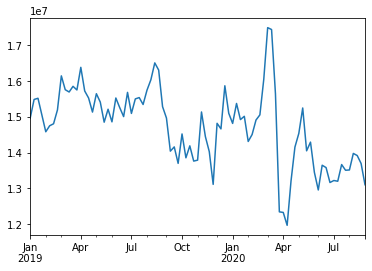

In [15]:
ax= acne_df["Acne"].plot()

In [16]:
df1 = acne_df["Acne"]
df2 = makuep_df["Makeup"]
df3 = lotion_df["Lotion"]

<AxesSubplot:>

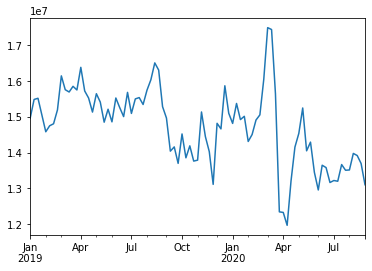

In [17]:
df1.plot()

<AxesSubplot:>

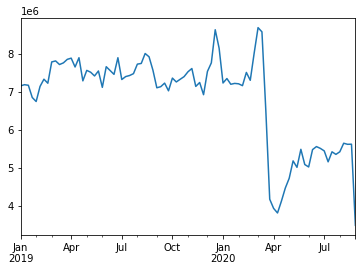

In [18]:
df2.plot()

<AxesSubplot:>

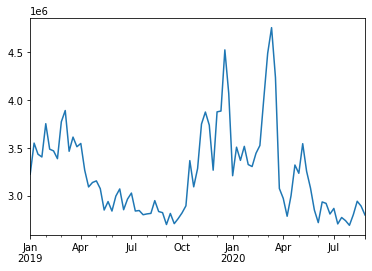

In [19]:
df3.plot()

In [20]:
#Decomposing Acne Data
decomp = sm.tsa.seasonal_decompose(acne_df['Acne'],freq=40) 
acne_decomp_data = pd.concat([acne_df, decomp.trend, decomp.seasonal, decomp.resid], axis=1)
acne_decomp_data.columns = ['Acne','acne_promo', 'trend', 'seasonal', 'resid']

acne_decomp_data.head()

<ipython-input-20-3b7d6bb62a07>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomp = sm.tsa.seasonal_decompose(acne_df['Acne'],freq=40)


,Acne,acne_promo,trend,seasonal,resid
2019-01-05,14969813,0,NaN,-1.104916e+06,NaN
2019-01-12,15488855,0,NaN,-8.138378e+05,NaN
2019-01-19,15522357,0,NaN,-1.297061e+06,NaN
2019-01-26,15054219,0,NaN,-1.299645e+06,NaN
2019-02-02,14585357,0,NaN,7.656801e+04,NaN


<AxesSubplot:>

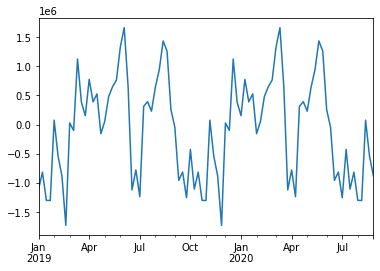

In [21]:
#Seasonality of Acne
acne_decomp_data['seasonal'].plot()

<AxesSubplot:>

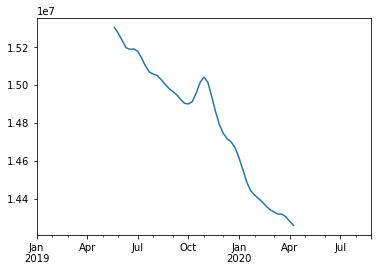

In [22]:
#Trend of Acne Sales
acne_decomp_data['trend'].dropna()
acne_decomp_data['trend'].plot()

<AxesSubplot:>

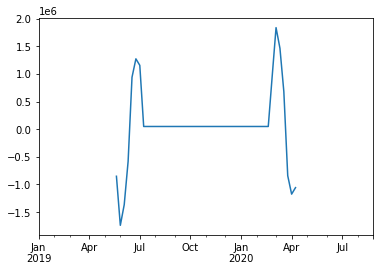

In [23]:
acne_decomp_data['resid'].plot()

In [24]:
#ADFuller Test -Seasonal Data is Stationary Acne
result = adfuller(acne_decomp_data["seasonal"], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -2.4608236256256357
n_lags: 0.1252995928443041
p-value: 0.1252995928443041
Critial Values:
   1%, -3.5219803175527606
Critial Values:
   5%, -2.9014701097664504
Critial Values:
   10%, -2.58807215485756


In [25]:
#Acne Transform to stationary
acne_df['returns']= acne_df['Acne'].pct_change()
acne_df=acne_df.dropna()
acne_df.head()

Date,Acne,acne_promo,returns
2019-01-12,15488855,0,0.034673
2019-01-19,15522357,0,0.002163
2019-01-26,15054219,0,-0.030159
2019-02-02,14585357,0,-0.031145
2019-02-09,14753443,0,0.011524


<AxesSubplot:>

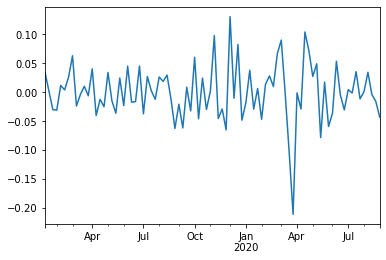

In [26]:
acne_df['returns'].plot()

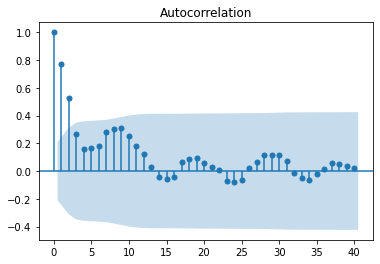

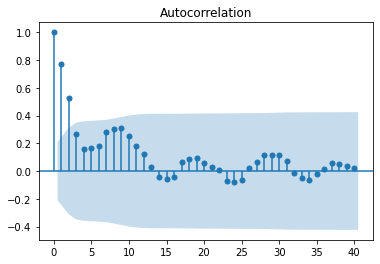

In [27]:
#Acne Autocorrelation
plot_acf(acne_df['Acne'], lags=40)

C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


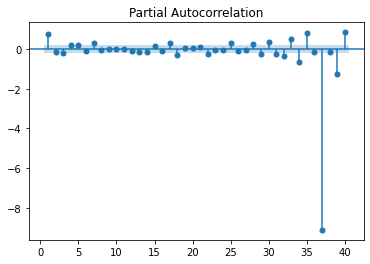

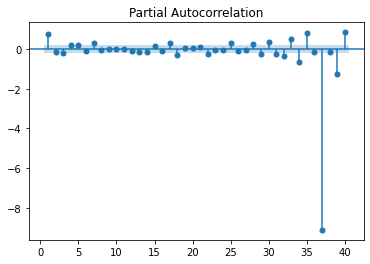

In [28]:
#Acne Partial Autocorrelation
plot_pacf(acne_df['Acne'], zero=False, lags= 40)

In [30]:
#Acne GARCH Model
returns = acne_df['Acne'].pct_change() * 100
returns = returns.dropna()
returns.tail()

2020-08-01    0.059701
2020-08-08    3.420426
2020-08-15   -0.419845
2020-08-22   -1.604021
2020-08-29   -4.336733
Name: Acne, dtype: float64

In [34]:
model = arch_model(returns, mean='Zero', vol='GARCH')

In [35]:
res = model.fit(disp='off')

In [36]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                   Acne   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.012
Vol Model:                      GARCH   Log-Likelihood:               -246.010
Distribution:                  Normal   AIC:                           498.019
Method:            Maximum Likelihood   BIC:                           505.347
                                        No. Observations:                   85
Date:                Fri, Aug 06 2021   Df Residuals:                       85
Time:                        20:10:49   Df Model:                            0
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          3.1071      1.336      2.326  2.001e-02    [  0.489,  5.725]
alpha[1]       0.3055      0.169      1.804  7.129e-02 [-2.648e-02,  0.638]
beta[1]        0.5822      0.118      4.921  8.590e-07    [  0.350,  0.814]
===========================================================================

Covariance estimator: robust
"""

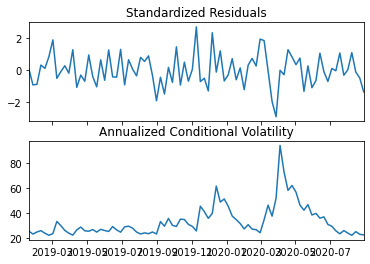

In [37]:
fig = res.plot(annualize='W')

In [38]:
#Acne Future forecast 252 days
forecast_horizon = 252
forecasts = res.forecast(start='29-AUG-20', horizon=forecast_horizon)
forecasts

C:\Users\wilbr\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [39]:
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.243,h.244,h.245,h.246,h.247,h.248,h.249,h.250,h.251,h.252
2020-08-29,60.681507,63.652842,66.178783,68.342859,70.208022,71.823136,73.227016,74.451049,75.52099,76.458222,...,83.496633,83.496633,83.496633,83.496633,83.496633,83.496633,83.496633,83.496633,83.496633,83.496633


In [40]:
final = intermediate.dropna().T
final

,2020-08-29
h.001,60.681507
h.002,63.652842
h.003,66.178783
h.004,68.342859
h.005,70.208022
...,...
h.248,83.496633
h.249,83.496633
h.250,83.496633
h.251,83.496633


In [41]:
#ACNE SARIMA Model
model=SARIMAX(endog=acne_df['Acne'], order=(2,1,2),
              seasonal_order=(2,1,2,12),
              trend='c',enforce_invertibility=False
             )
acne_results=model.fit()
print(acne_results.summary())

C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  warnings.warn('No frequency information was'
C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                               Acne   No. Observations:                   86
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -1107.735
Date:                            Fri, 06 Aug 2021   AIC                           2235.471
Time:                                    20:11:09   BIC                           2258.376
Sample:                                01-12-2019   HQIC                          2244.599
                                     - 08-29-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1833.3919   1.06e+05      0.017      0.986   -2.05e+05    2.09e+05
ar.L1          1.1324      0.129   

C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


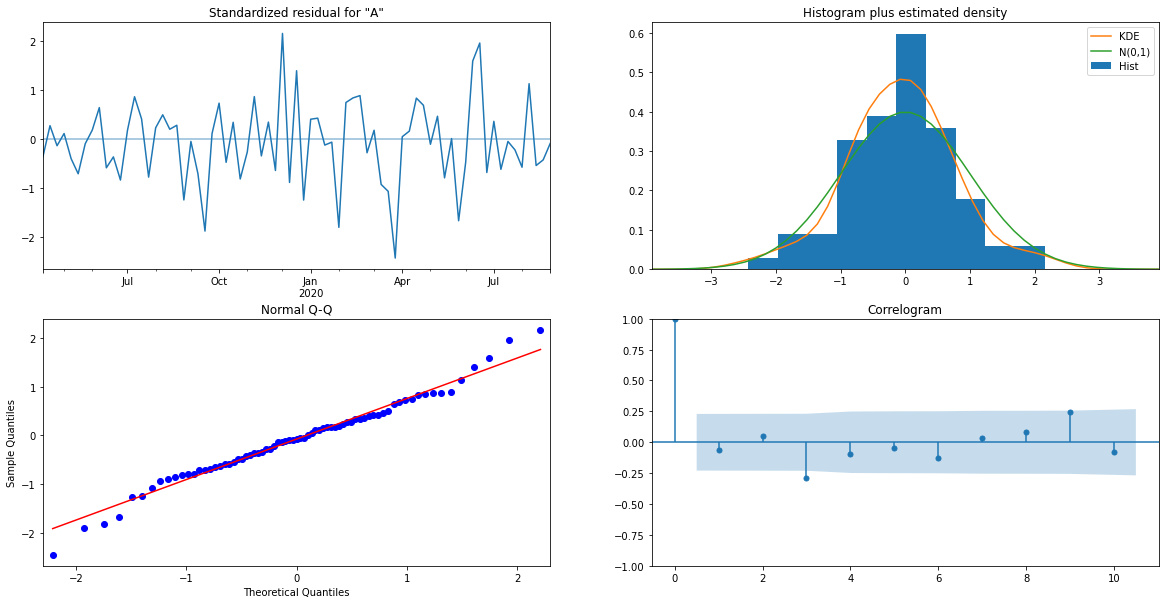

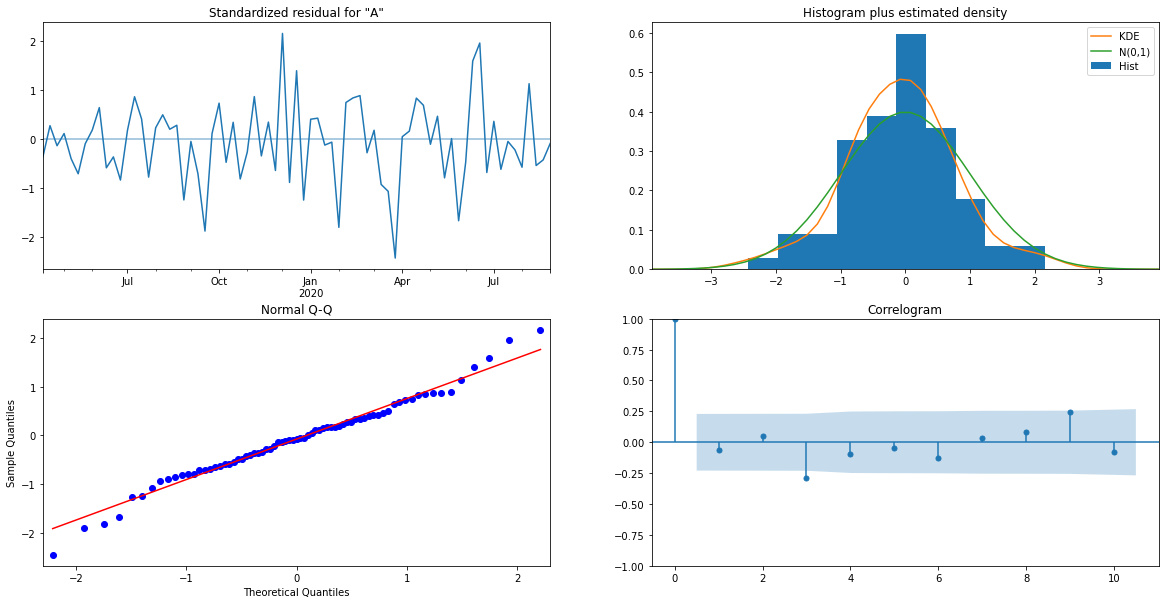

In [42]:
acne_results.plot_diagnostics(figsize=(20,10))

In [43]:
#Acne Arima Model
acne_arima_mod = ARIMA(acne_df["Acne"], order=(2,1,2))

C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SAT

In [44]:
acne_arima_results = acne_arima_mod.fit()

C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\wilbr\anaconda3\lib\sit

In [45]:
acne_arima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Acne   No. Observations:                   85
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1258.305
Method:                       css-mle   S.D. of innovations         631743.450
Date:                Fri, 06 Aug 2021   AIC                           2528.610
Time:                        20:11:14   BIC                           2543.266
Sample:                    01-19-2019   HQIC                          2534.505
                         - 08-29-2020                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.608e+04   8427.360     -3.095      0.002   -4.26e+04   -9565.594
ar.L1.D.Acne    -0.1881      0.093     -2.032      0.042      -0.370      -0.007
ar.L2.D.Acne     0.5804      0.093      6.257      0.000       0.399       0.762
ma.L1.D.Acne          0      0.061          0      1.000      -0.119       0.119
ma.L2.D.Acne    -1.0000      0.061    -16.503      0.000      -1.119      -0.881
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1605           +0.0000j            1.1605            0.5000
AR.2            1.4846           +0.0000j            1.4846            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.0000           +0.0000j            1.0000            0.5000
-----------------------------------------------------------------------------
"""

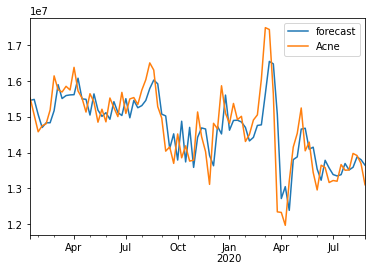

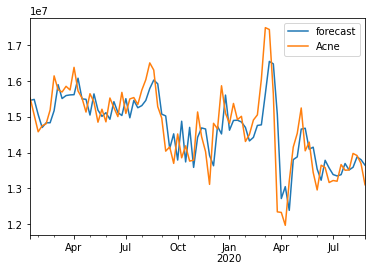

In [46]:
acne_arima_results.plot_predict()

In [47]:
#Lotion Product Sales
lotion_df.head()

Date,Lotion,lotion_promo
2019-01-05,3227827,0
2019-01-12,3551875,0
2019-01-19,3435812,0
2019-01-26,3406859,0
2019-02-02,3754491,0


In [48]:
#Decomposing Lotion Data
decomp = sm.tsa.seasonal_decompose(lotion_df['Lotion'],freq=40)
lotion_decomp_data = pd.concat([lotion_df, decomp.trend, decomp.seasonal, decomp.resid], axis=1)
lotion_decomp_data.columns = ['Lotion','lotion_promo', 'trend', 'seasonal', 'resid']

lotion_decomp_data.head()

<ipython-input-48-fb32bc25d940>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomp = sm.tsa.seasonal_decompose(lotion_df['Lotion'],freq=40)


,Lotion,lotion_promo,trend,seasonal,resid
2019-01-05,3227827,0,NaN,-318665.059219,NaN
2019-01-12,3551875,0,NaN,119273.878281,NaN
2019-01-19,3435812,0,NaN,-196895.846719,NaN
2019-01-26,3406859,0,NaN,-42111.259219,NaN
2019-02-02,3754491,0,NaN,404872.640781,NaN


<AxesSubplot:>

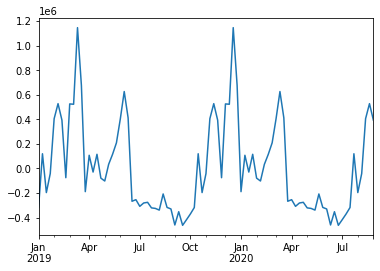

In [49]:
lotion_decomp_data['seasonal'].plot()

<AxesSubplot:>

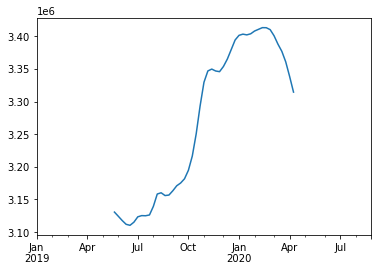

In [50]:
lotion_decomp_data['trend'].plot()

<AxesSubplot:>

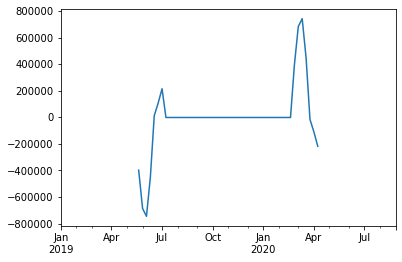

In [51]:
lotion_decomp_data['resid'].plot()

In [52]:
lotion_noise, lotion_trend = sm.tsa.filters.hpfilter(lotion_df['Lotion']) 

<AxesSubplot:>

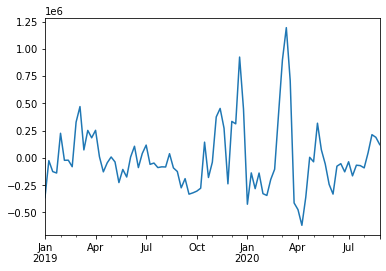

In [53]:
lotion_noise.plot()

<AxesSubplot:>

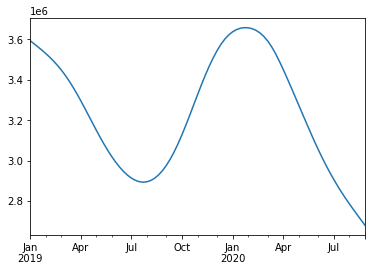

In [54]:
lotion_trend.plot()

In [55]:
#ADFuller Test -Seasonal Data is Stationary
result = adfuller(lotion_decomp_data["seasonal"], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -3.8250431208140463
n_lags: 0.0026612364560095678
p-value: 0.0026612364560095678
Critial Values:
   1%, -3.5087828609430614
Critial Values:
   5%, -2.895783561573195
Critial Values:
   10%, -2.5850381719848565


In [56]:
#Acne Transform to stationary
acne_df['returns']= acne_df['Acne'].pct_change()
acne_df=acne_df.dropna()
acne_df.head()

Date,Acne,acne_promo,returns
2019-01-19,15522357,0,0.002163
2019-01-26,15054219,0,-0.030159
2019-02-02,14585357,0,-0.031145
2019-02-09,14753443,0,0.011524
2019-02-16,14809032,0,0.003768


<AxesSubplot:>

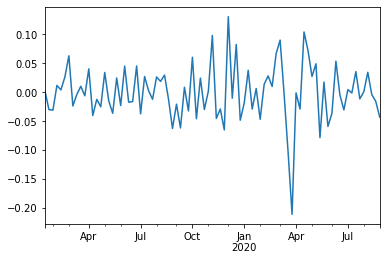

In [57]:
acne_df['returns'].plot()

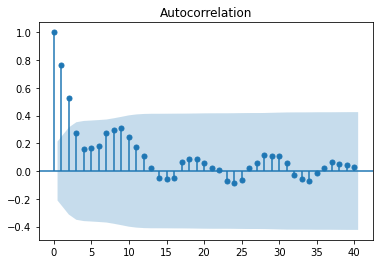

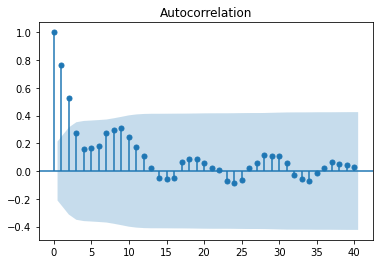

In [58]:
#Acne Autocorrelation
plot_acf(acne_df['Acne'], lags=40)

C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


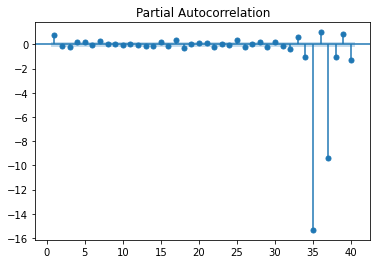

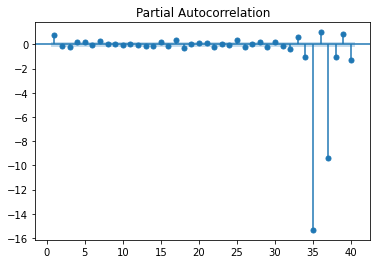

In [59]:
#Acne Partial Autocorrelation
plot_pacf(acne_df['Acne'], zero=False, lags= 40)

In [62]:
#Acne GARCH Model
returns = acne_df['Acne'].pct_change() * 100
returns = returns.dropna()
returns.tail()

2020-08-01    0.059701
2020-08-08    3.420426
2020-08-15   -0.419845
2020-08-22   -1.604021
2020-08-29   -4.336733
Name: Acne, dtype: float64

In [66]:
model = arch_model(returns, mean='Zero', vol='GARCH')

In [67]:
res = model.fit(disp='off')

In [68]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                   Acne   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.012
Vol Model:                      GARCH   Log-Likelihood:               -243.904
Distribution:                  Normal   AIC:                           493.808
Method:            Maximum Likelihood   BIC:                           501.101
                                        No. Observations:                   84
Date:                Fri, Aug 06 2021   Df Residuals:                       84
Time:                        20:12:08   Df Model:                            0
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          3.2428      1.393      2.328  1.993e-02    [  0.512,  5.973]
alpha[1]       0.3077      0.172      1.789  7.363e-02 [-2.942e-02,  0.645]
beta[1]        0.5751      0.120      4.795  1.631e-06    [  0.340,  0.810]
===========================================================================

Covariance estimator: robust
"""

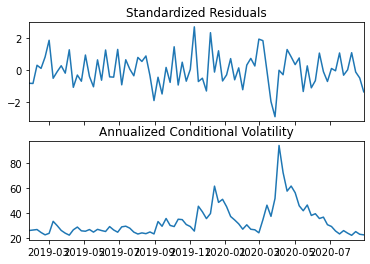

In [69]:
fig = res.plot(annualize='W')

In [301]:
#Acne Future forecast 52 weeks
forecast_horizon = 10
forecasts = res.forecast(start='29-AUG-20', horizon=forecast_horizon)
forecasts

C:\Users\wilbr\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [302]:
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10
2020-08-29,153.261468,153.98685,154.708831,155.427459,156.142779,156.854837,157.563678,158.269343,158.971877,159.671319


In [303]:
final = intermediate.dropna().T
final

,2020-08-29
h.01,153.261468
h.02,153.986850
h.03,154.708831
h.04,155.427459
h.05,156.142779
h.06,156.854837
h.07,157.563678
h.08,158.269343
h.09,158.971877
h.10,159.671319


<AxesSubplot:>

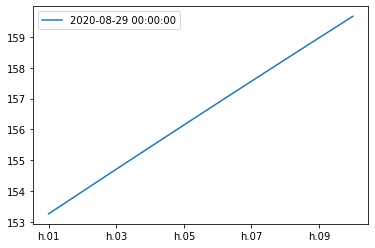

In [304]:
final.plot()

In [73]:
#ACNE SARIMA Model
model=SARIMAX(endog=acne_df['Acne'], order=(2,1,2),
              seasonal_order=(2,1,2,12),
              trend='c',enforce_invertibility=False
             )
acne_results=model.fit()
print(acne_results.summary())

C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  warnings.warn('No frequency information was'
C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  warnings.warn('No frequency information was'
C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                               Acne   No. Observations:                   85
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -1092.756
Date:                            Fri, 06 Aug 2021   AIC                           2205.512
Time:                                    20:13:14   BIC                           2228.279
Sample:                                01-19-2019   HQIC                          2214.575
                                     - 08-29-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.101e+04   1.93e+05      0.057      0.954   -3.67e+05    3.89e+05
ar.L1         -1.2784      0.289   

C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


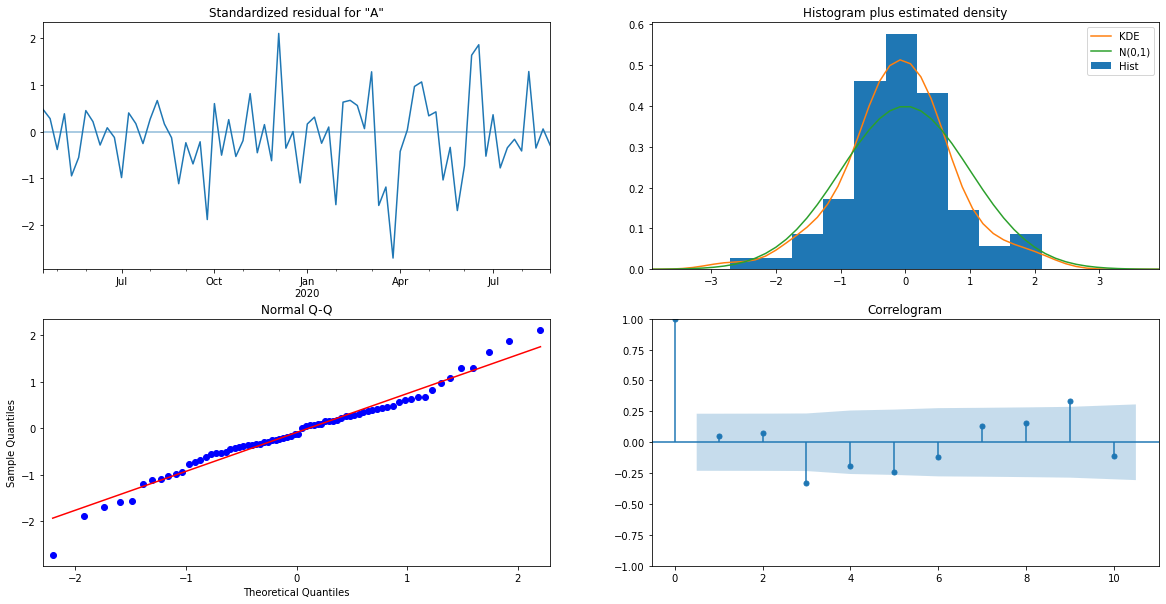

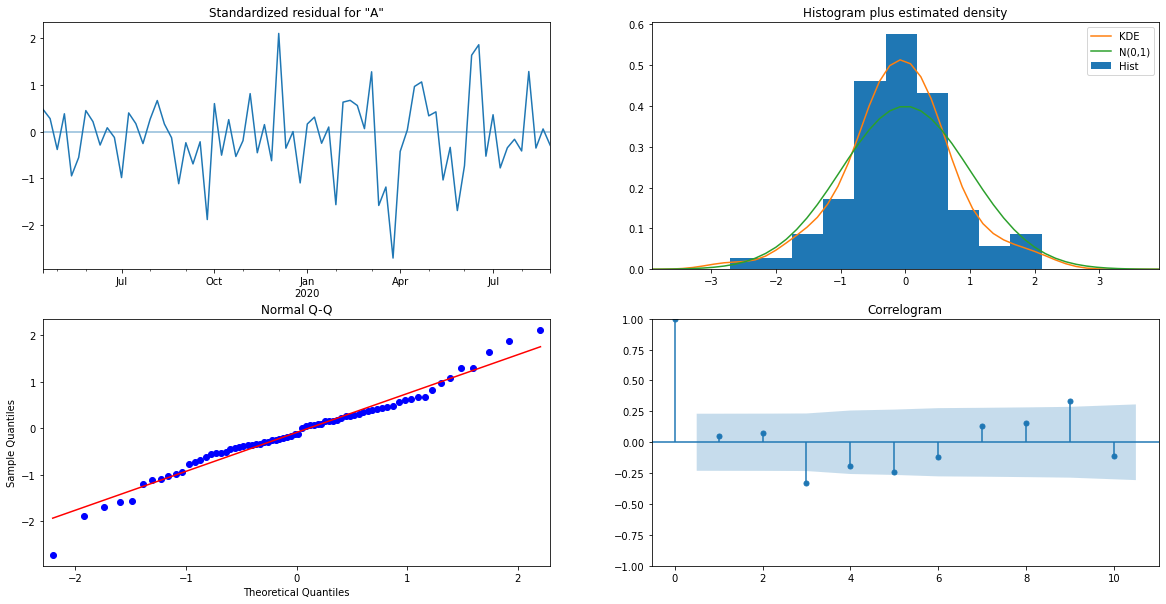

In [74]:
acne_results.plot_diagnostics(figsize=(20,10))

In [75]:
#Acne Arima Model
acne_arima_mod = ARIMA(acne_df["Acne"], order=(2,1,2))

C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SAT

In [76]:
acne_arima_results = acne_arima_mod.fit()

C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [77]:
acne_arima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Acne   No. Observations:                   84
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1242.068
Method:                       css-mle   S.D. of innovations         624484.878
Date:                Fri, 06 Aug 2021   AIC                           2496.136
Time:                        20:13:18   BIC                           2510.721
Sample:                    01-26-2019   HQIC                          2501.999
                         - 08-29-2020                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.878e+04   5706.926     -5.043      0.000      -4e+04   -1.76e+04
ar.L1.D.Acne     1.3011      0.179      7.282      0.000       0.951       1.651
ar.L2.D.Acne    -0.5685      0.130     -4.374      0.000      -0.823      -0.314
ma.L1.D.Acne    -1.4657      0.202     -7.271      0.000      -1.861      -1.071
ma.L2.D.Acne     0.4662      0.197      2.363      0.018       0.079       0.853
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1444           -0.6705j            1.3263           -0.0843
AR.2            1.1444           +0.6705j            1.3263            0.0843
MA.1            1.0009           +0.0000j            1.0009            0.0000
MA.2            2.1428           +0.0000j            2.1428            0.0000
-----------------------------------------------------------------------------
"""

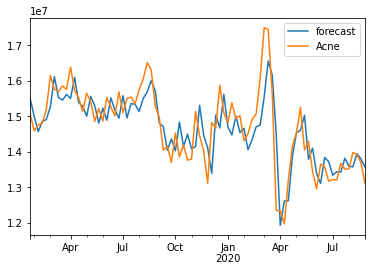

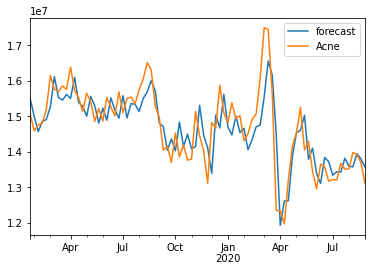

In [78]:
acne_arima_results.plot_predict()

In [79]:
#Lotion Product Sales

In [80]:
#Decomposing Lotion Data
decomp = sm.tsa.seasonal_decompose(lotion_df['Lotion'],freq=40)
lotion_decomp_data = pd.concat([lotion_df, decomp.trend, decomp.seasonal, decomp.resid], axis=1)
lotion_decomp_data.columns = ['Lotion','lotion_promo', 'trend', 'seasonal', 'resid']

lotion_decomp_data.head()

<ipython-input-80-fb32bc25d940>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomp = sm.tsa.seasonal_decompose(lotion_df['Lotion'],freq=40)


,Lotion,lotion_promo,trend,seasonal,resid
2019-01-05,3227827,0,NaN,-318665.059219,NaN
2019-01-12,3551875,0,NaN,119273.878281,NaN
2019-01-19,3435812,0,NaN,-196895.846719,NaN
2019-01-26,3406859,0,NaN,-42111.259219,NaN
2019-02-02,3754491,0,NaN,404872.640781,NaN


<AxesSubplot:>

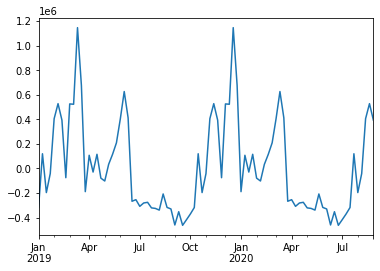

In [81]:
lotion_decomp_data['seasonal'].plot()

<AxesSubplot:>

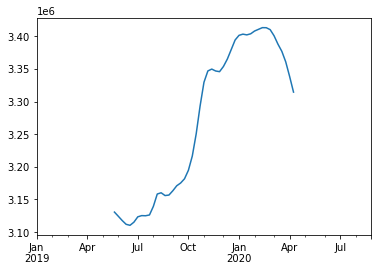

In [82]:
lotion_decomp_data['trend'].plot()

<AxesSubplot:>

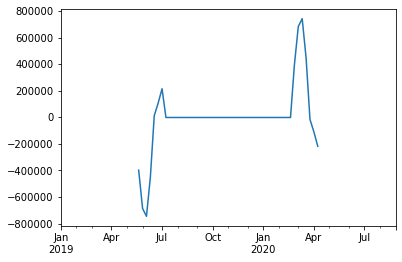

In [83]:
lotion_decomp_data['resid'].plot()

In [84]:
lotion_noise, lotion_trend = sm.tsa.filters.hpfilter(lotion_df['Lotion'])

<AxesSubplot:>

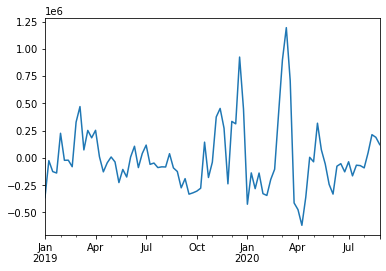

In [85]:
lotion_noise.plot()

<AxesSubplot:>

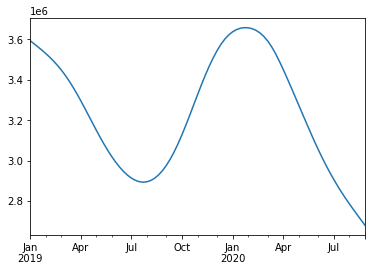

In [86]:
lotion_trend.plot()

In [87]:
#ADFuller Test -Seasonal Data is Stationary
result = adfuller(lotion_decomp_data["seasonal"], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -3.8250431208140463
n_lags: 0.0026612364560095678
p-value: 0.0026612364560095678
Critial Values:
   1%, -3.5087828609430614
Critial Values:
   5%, -2.895783561573195
Critial Values:
   10%, -2.5850381719848565


In [88]:
# Transform Lotion data to stationary
lotion_df['returns']= lotion_df['Lotion'].pct_change()
lotion_df=lotion_df.dropna()
lotion_df.head()

Date,Lotion,lotion_promo,returns
2019-01-12,3551875,0,0.100392
2019-01-19,3435812,0,-0.032677
2019-01-26,3406859,0,-0.008427
2019-02-02,3754491,0,0.102039
2019-02-09,3488703,0,-0.070792


<AxesSubplot:>

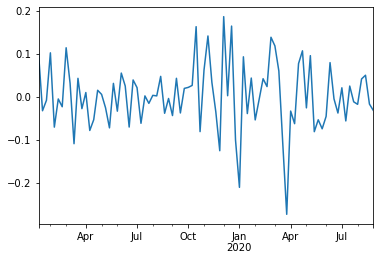

In [89]:
lotion_df['returns'].plot()

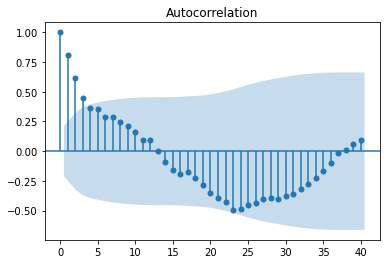

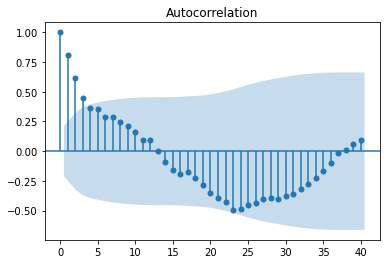

In [90]:
plot_acf(lotion_df['Lotion'], lags=40)

C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


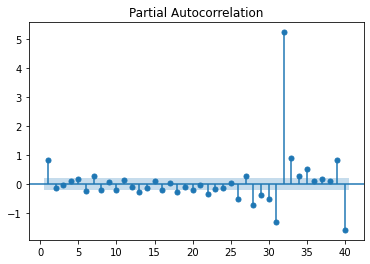

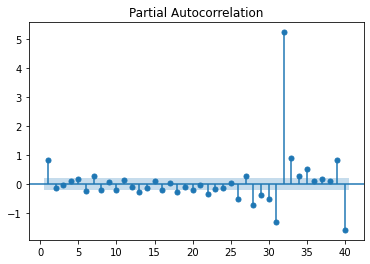

In [91]:
plot_pacf(lotion_df['Lotion'], zero=False, lags= 40)

In [93]:
#Lotion Garch Model
lotion_returns = lotion_df['Lotion'].pct_change() * 100
lotion_returns = lotion_returns.dropna()
lotion_returns.tail()

2020-08-01   -1.777311
2020-08-08    4.128402
2020-08-15    4.991345
2020-08-22   -1.714548
2020-08-29   -3.216952
Name: Lotion, dtype: float64

In [94]:
lotion_model = arch_model(lotion_returns, mean='Zero', vol='GARCH')

In [95]:
lotion_res = lotion_model.fit(disp='off')

In [96]:
lotion_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                 Lotion   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.012
Vol Model:                      GARCH   Log-Likelihood:               -286.561
Distribution:                  Normal   AIC:                           579.122
Method:            Maximum Likelihood   BIC:                           586.450
                                        No. Observations:                   85
Date:                Fri, Aug 06 2021   Df Residuals:                       85
Time:                        20:13:49   Df Model:                            0
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          5.5113      5.244      1.051      0.293    [ -4.766, 15.789]
alpha[1]       0.2072      0.107      1.930  5.362e-02 [-3.227e-03,  0.418]
beta[1]        0.7014      0.119      5.899  3.647e-09    [  0.468,  0.934]
===========================================================================

Covariance estimator: robust
"""

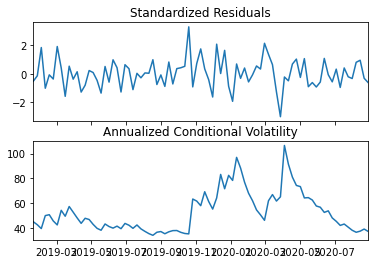

In [97]:
#Lotion Sales Volatility
lotion_fig = lotion_res.plot(annualize='W')

In [297]:
forecast_horizon = 10
lotion_forecasts = lotion_res.forecast(start='29-AUG-20', horizon=forecast_horizon)
lotion_forecasts

C:\Users\wilbr\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [298]:
lotion_intermediate = np.sqrt(lotion_forecasts.variance.dropna() * 252)
lotion_intermediate.head()

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10
2020-08-29,81.926835,86.530354,90.510405,93.980719,97.026349,99.71304,102.092932,104.208232,106.093672,107.778225


In [299]:
lotion_final = lotion_intermediate.dropna().T
lotion_final

,2020-08-29
h.01,81.926835
h.02,86.530354
h.03,90.510405
h.04,93.980719
h.05,97.026349
h.06,99.713040
h.07,102.092932
h.08,104.208232
h.09,106.093672
h.10,107.778225


<AxesSubplot:>

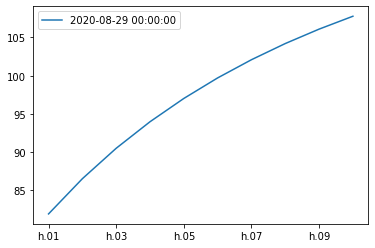

In [300]:
lotion_final.plot()

In [101]:
#Lotion SARIMA Model
lotion_sar_model=SARIMAX(endog=lotion_df['Lotion'], order=(2,1,2),
              seasonal_order=(2,1,2,12),
              trend='c',enforce_invertibility=False
             )
lotion_results=lotion_sar_model.fit()
print(lotion_results.summary())

C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  warnings.warn('No frequency information was'
C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                             Lotion   No. Observations:                   86
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -1027.664
Date:                            Fri, 06 Aug 2021   AIC                           2075.329
Time:                                    20:13:56   BIC                           2098.233
Sample:                                01-12-2019   HQIC                          2084.456
                                     - 08-29-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7640.2162   1.63e+04      0.468      0.640   -2.44e+04    3.96e+04
ar.L1          1.2953      0.326   

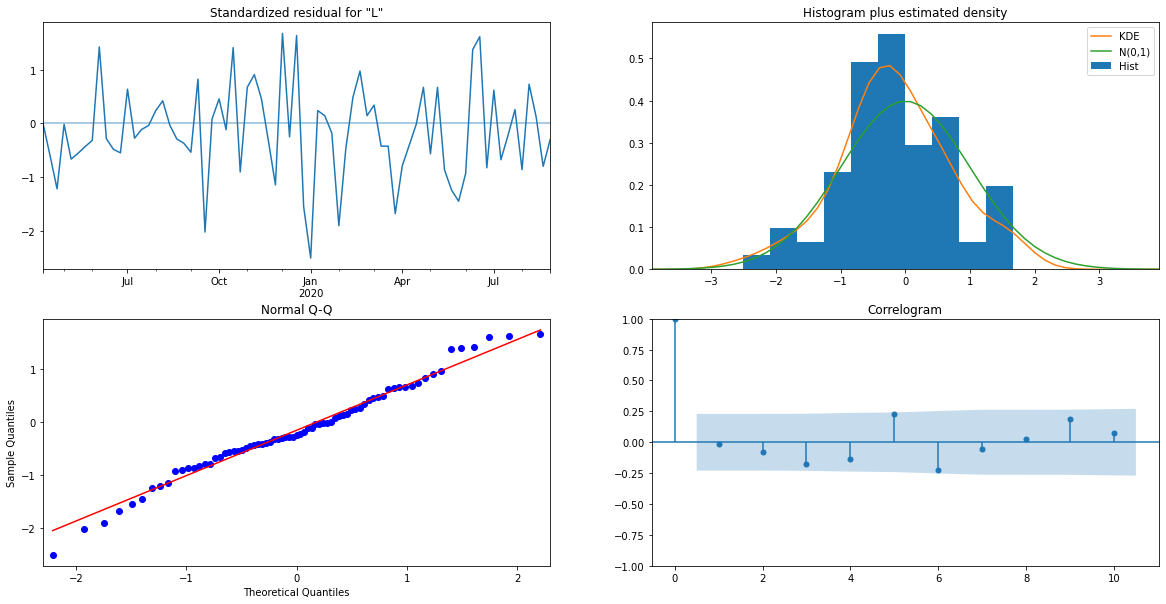

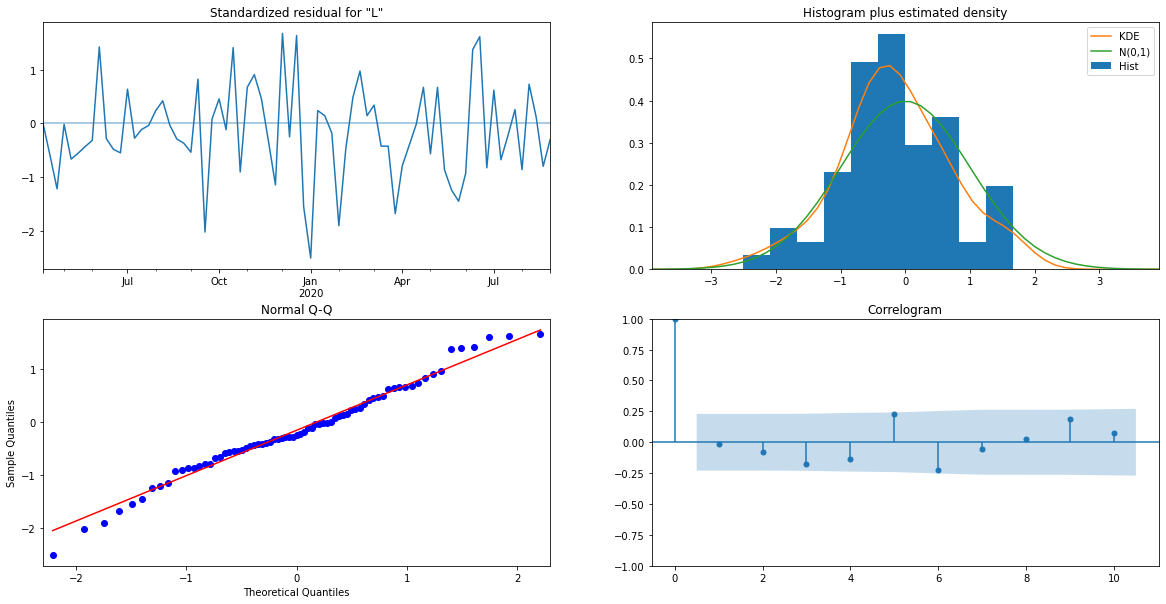

In [102]:
lotion_results.plot_diagnostics(figsize=(20,10))

In [103]:
#Lotion ARIMA Model
lotion_arima_mod = ARIMA(lotion_df["Lotion"], order=(2,1,2))

C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SAT

In [104]:
lotion_arima_results = lotion_arima_mod.fit()

C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarni

In [105]:
lotion_arima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Lotion   No. Observations:                   85
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1179.899
Method:                       css-mle   S.D. of innovations         254328.250
Date:                Fri, 06 Aug 2021   AIC                           2371.798
Time:                        20:13:58   BIC                           2386.454
Sample:                    01-19-2019   HQIC                          2377.694
                         - 08-29-2020                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3774.8646   5448.116     -0.693      0.488   -1.45e+04    6903.247
ar.L1.D.Lotion     0.0562      0.110      0.511      0.609      -0.159       0.272
ar.L2.D.Lotion     0.6031      0.108      5.577      0.000       0.391       0.815
ma.L1.D.Lotion    -0.0753      0.063     -1.200      0.230      -0.198       0.048
ma.L2.D.Lotion    -0.9247      0.061    -15.122      0.000      -1.045      -0.805
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2419           +0.0000j            1.2419            0.0000
AR.2           -1.3350           +0.0000j            1.3350            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.0814           +0.0000j            1.0814            0.5000
-----------------------------------------------------------------------------
"""

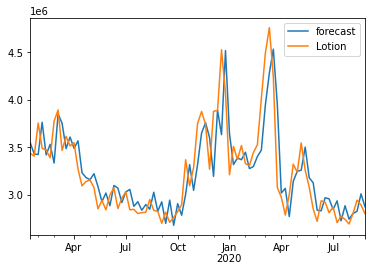

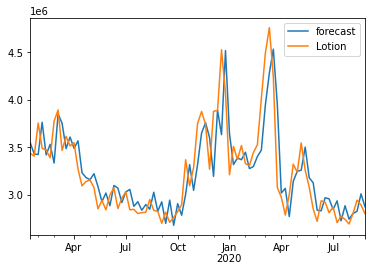

In [106]:
#Lotion Future Forecast Predict ARIMA
lotion_arima_results.plot_predict()

In [107]:
#Makeup Product Sales
makeup_df

Date,Makeup,makeup_promo
2019-01-05,7156661,0
2019-01-12,7188663,0
2019-01-19,7173238,0
2019-01-26,6851425,0
2019-02-02,6745738,0
...,...,...
2020-08-01,5422756,1
2020-08-08,5647887,1
2020-08-15,5619787,1
2020-08-22,5622940,1


In [108]:
#Decomposing Makeup Data
decomp = sm.tsa.seasonal_decompose(makeup_df['Makeup'],freq=40)
makeup_decomp_data = pd.concat([makeup_df, decomp.trend, decomp.seasonal, decomp.resid], axis=1)
makeup_decomp_data.columns = ['Makeup','makeup_promo', 'trend', 'seasonal', 'resid']

<ipython-input-108-9b68dd61a79a>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomp = sm.tsa.seasonal_decompose(makeup_df['Makeup'],freq=40)


In [109]:
makeup_decomp_data.head()

,Makeup,makeup_promo,trend,seasonal,resid
2019-01-05,7156661,0,NaN,-397333.866406,NaN
2019-01-12,7188663,0,NaN,-352499.741406,NaN
2019-01-19,7173238,0,NaN,-314075.978906,NaN
2019-01-26,6851425,0,NaN,-184717.816406,NaN
2019-02-02,6745738,0,NaN,-44181.741406,NaN


<AxesSubplot:>

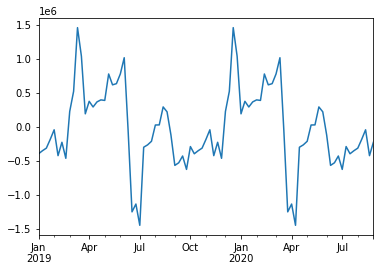

In [110]:
makeup_decomp_data['seasonal'].plot()

<AxesSubplot:>

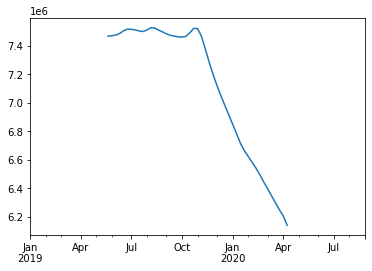

In [111]:
makeup_decomp_data['trend'].plot()

<AxesSubplot:>

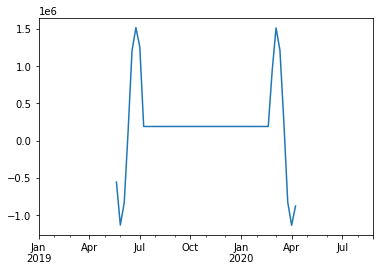

In [112]:
makeup_decomp_data['resid'].plot()

In [113]:
#Makeup Noise and Trend
makeup_noise, makeup_trend = sm.tsa.filters.hpfilter(makeup_df['Makeup'])

<AxesSubplot:>

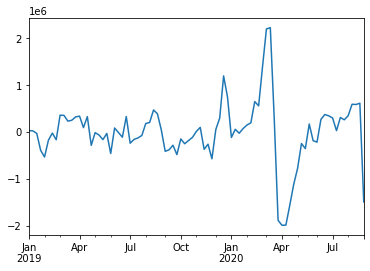

In [114]:
makeup_noise.plot()

<AxesSubplot:>

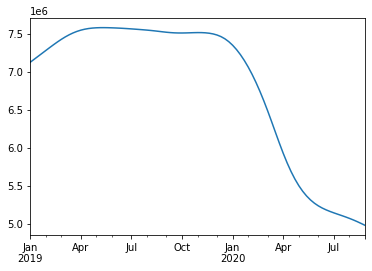

In [115]:
makeup_trend.plot()

In [116]:
#ADFuller Test -Seasonal Data is Stationary Makeup Seasonal Data
result = adfuller(makeup_decomp_data["seasonal"], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -3.3405022335762635
n_lags: 0.013162286878336982
p-value: 0.013162286878336982
Critial Values:
   1%, -3.5219803175527606
Critial Values:
   5%, -2.9014701097664504
Critial Values:
   10%, -2.58807215485756


In [117]:
#Transform Makeup Data into Stationary Data
makeup_df['returns']= makeup_df['Makeup'].pct_change()
makeup_df=makeup_df.dropna()
makeup_df.head()

Date,Makeup,makeup_promo,returns
2019-01-12,7188663,0,0.004472
2019-01-19,7173238,0,-0.002146
2019-01-26,6851425,0,-0.044863
2019-02-02,6745738,0,-0.015426
2019-02-09,7142905,0,0.058877


<AxesSubplot:>

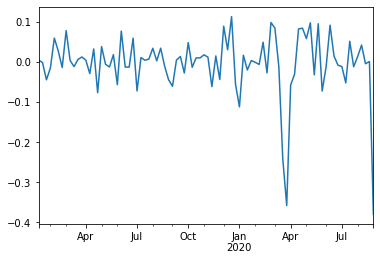

In [118]:
makeup_df['returns'].plot()

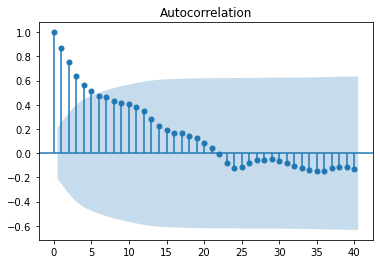

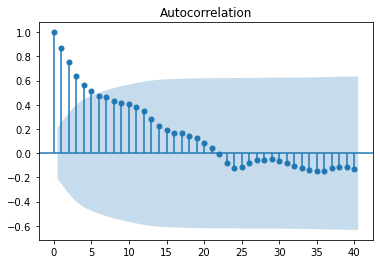

In [119]:
#Makeup Autocorrelation
plot_acf(makeup_df['Makeup'], lags=40)

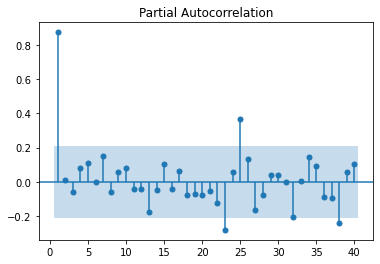

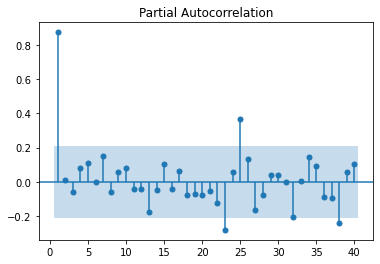

In [120]:
plot_pacf(makeup_df['Makeup'], zero=False, lags=40)

In [123]:
#Makeup Garch Results
makeup_garch_returns = makeup_df['Makeup'].pct_change() * 100
makeup_garch_returns = makeup_garch_returns.dropna()
makeup_garch_returns.tail()

2020-08-01     1.269370
2020-08-08     4.151597
2020-08-15    -0.497531
2020-08-22     0.056105
2020-08-29   -37.965744
Name: Makeup, dtype: float64

In [124]:
model = arch_model(makeup_garch_returns, mean='Zero', vol='GARCH', p=1, q=1)

In [125]:
res = model.fit(disp='off')

In [126]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                 Makeup   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.012
Vol Model:                      GARCH   Log-Likelihood:               -282.686
Distribution:                  Normal   AIC:                           571.372
Method:            Maximum Likelihood   BIC:                           578.700
                                        No. Observations:                   85
Date:                Fri, Aug 06 2021   Df Residuals:                       85
Time:                        20:14:21   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.8844      2.103      0.420      0.674      [ -3.238,  5.007]
alpha[1]       0.0000  4.556e-02      0.000      1.000 [-8.929e-02,8.929e-02]
beta[1]        1.0000  3.664e-02     27.290 5.602e-164      [  0.928,  1.072]
=============================================================================

Covariance estimator: robust
"""

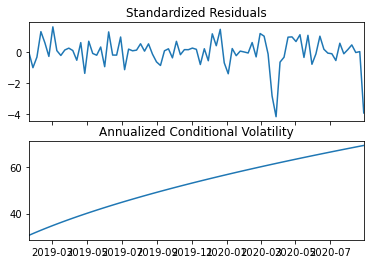

In [127]:
#Makeup Sales Volatility
fig = res.plot(annualize='W')

In [305]:
forecast_horizon = 10
forecasts = res.forecast(start='29-AUG-20', horizon=forecast_horizon)
forecasts

C:\Users\wilbr\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [306]:
intermediate = np.sqrt(forecasts.variance.dropna() * 52)
intermediate.head()

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10
2020-08-29,69.620058,69.949568,70.277533,70.603974,70.928913,71.252371,71.574366,71.894919,72.21405,72.531776


In [307]:
final = intermediate.dropna().T
final

,2020-08-29
h.01,69.620058
h.02,69.949568
h.03,70.277533
h.04,70.603974
h.05,70.928913
h.06,71.252371
h.07,71.574366
h.08,71.894919
h.09,72.214050
h.10,72.531776


<AxesSubplot:>

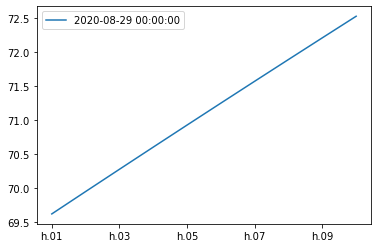

In [308]:
final.plot()

In [132]:
#SARIMA Analysis
makeup_model=SARIMAX(endog=makeup_df['Makeup'].astype('float'), order=(2,1,2),
              seasonal_order=(2,1,2,12),
              trend='c',enforce_invertibility=False
             )
makeup_results=makeup_model.fit()
print(makeup_results.summary())

C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  warnings.warn('No frequency information was'
C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  warnings.warn('No frequency information was'
C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:996: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


                                     SARIMAX Results                                      
Dep. Variable:                             Makeup   No. Observations:                   86
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -1073.191
Date:                            Fri, 06 Aug 2021   AIC                           2166.382
Time:                                    20:14:30   BIC                           2189.286
Sample:                                01-12-2019   HQIC                          2175.509
                                     - 08-29-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -2.875e+04   4.99e+04     -0.576      0.564   -1.26e+05     6.9e+04
ar.L1          1.1842      0.698   

C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


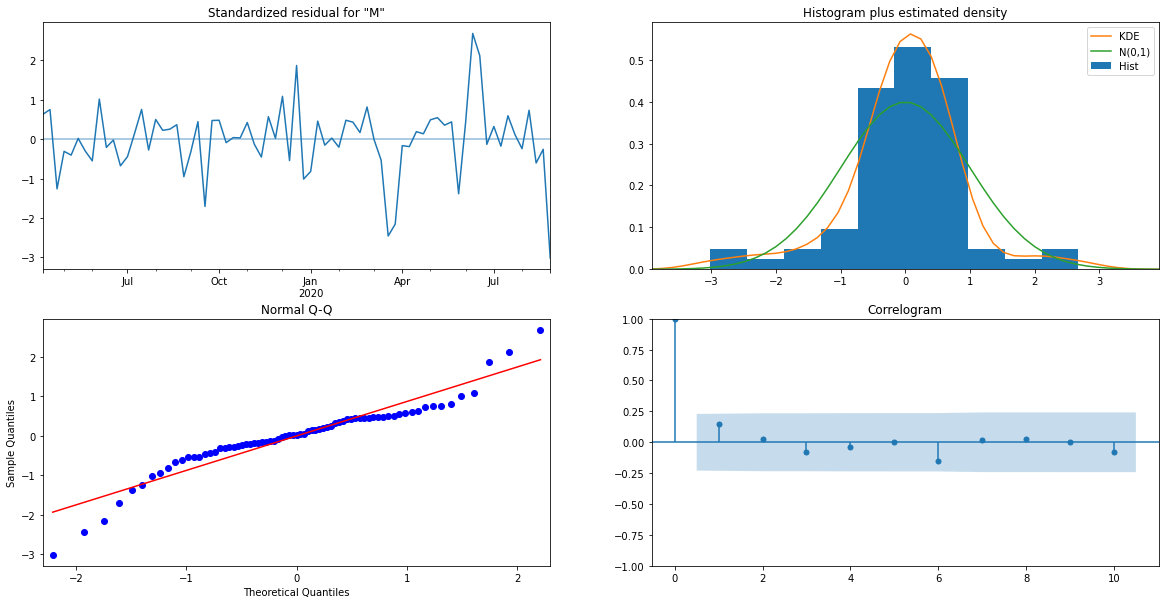

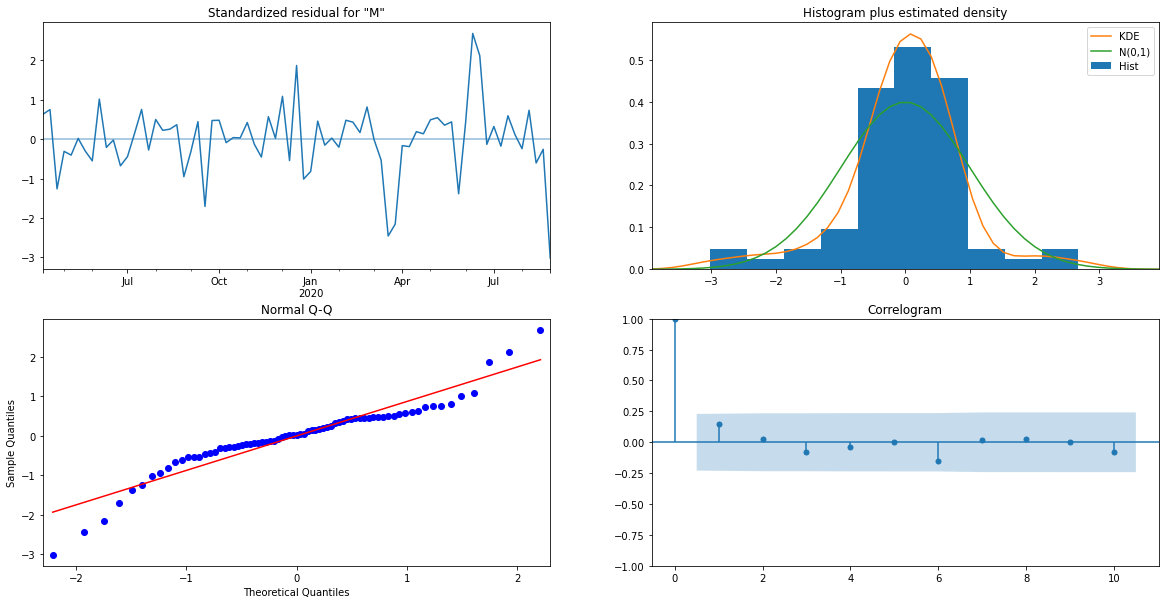

In [133]:
#Makeup SARIMA Diagnostic
makeup_results.plot_diagnostics(figsize=(20,10))

In [134]:
#Makeup ARIMA model
makeup_model = ARIMA(makeup_df['Makeup'].values, order=(2, 1, 2))
makeup_results = makeup_model.fit()
makeup_results.summary()

C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   85
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1232.408
Method:                       css-mle   S.D. of innovations         466842.910
Date:                Fri, 06 Aug 2021   AIC                           2476.816
Time:                        20:14:31   BIC                           2491.472
Sample:                             1   HQIC                          2482.711
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.354e+04   6.17e+04     -0.705      0.481   -1.65e+05    7.75e+04
ar.L1.D.y     -0.8066      0.112     -7.213      0.000      -1.026      -0.587
ar.L2.D.y     -0.6786      0.089     -7.649      0.000      -0.852      -0.505
ma.L1.D.y      1.0343      0.066     15.589      0.000       0.904       1.164
ma.L2.D.y      0.9999      0.095     10.478      0.000       0.813       1.187
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.5943           -1.0585j            1.2139           -0.3314
AR.2           -0.5943           +1.0585j            1.2139            0.3314
MA.1           -0.5172           -0.8559j            1.0001           -0.3365
MA.2           -0.5172           +0.8559j            1.0001            0.3365
-----------------------------------------------------------------------------
"""

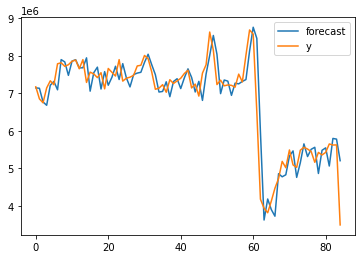

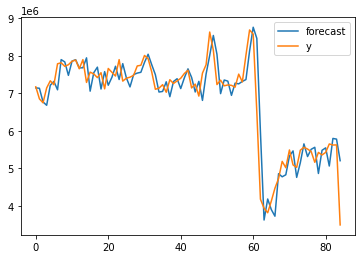

In [135]:
#Makeup Future Predict
makeup_results.plot_predict()

In [136]:
# Determing if promos affect sales.

In [137]:
X = acne_df['Acne'].to_frame()

In [138]:
# Generate a column with the week of the year
X['Week_of_Year'] = X.index.weekofyear
X.head()


<ipython-input-138-0d8505e88685>:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  X['Week_of_Year'] = X.index.weekofyear


,Acne,Week_of_Year
2019-01-19,15522357,3
2019-01-26,15054219,4
2019-02-02,14585357,5
2019-02-09,14753443,6
2019-02-16,14809032,7


In [139]:
acne_week=X.copy()

<AxesSubplot:xlabel='Week_of_Year', ylabel='Acne'>

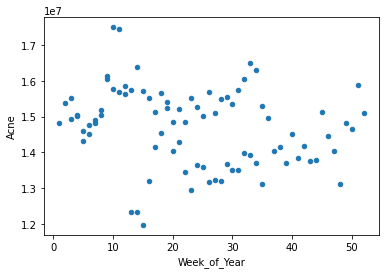

In [140]:
X.plot(x= "Week_of_Year", y="Acne", kind="scatter")

In [141]:
# Binary encode the weekly column to use as new input features for the model
X_binary_encoded = pd.get_dummies(X, columns=['Week_of_Year'])
X_binary_encoded.head()

,Acne,Week_of_Year_1,Week_of_Year_2,Week_of_Year_3,Week_of_Year_4,Week_of_Year_5,Week_of_Year_6,Week_of_Year_7,Week_of_Year_8,Week_of_Year_9,...,Week_of_Year_43,Week_of_Year_44,Week_of_Year_45,Week_of_Year_46,Week_of_Year_47,Week_of_Year_48,Week_of_Year_49,Week_of_Year_50,Week_of_Year_51,Week_of_Year_52
2019-01-19,15522357,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-26,15054219,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-02-02,14585357,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-02-09,14753443,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-02-16,14809032,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
# The Acne Sales column must be deleted from the input features
X_binary_encoded = X_binary_encoded.drop('Acne', axis=1)
X_binary_encoded.head()

,Week_of_Year_1,Week_of_Year_2,Week_of_Year_3,Week_of_Year_4,Week_of_Year_5,Week_of_Year_6,Week_of_Year_7,Week_of_Year_8,Week_of_Year_9,Week_of_Year_10,...,Week_of_Year_43,Week_of_Year_44,Week_of_Year_45,Week_of_Year_46,Week_of_Year_47,Week_of_Year_48,Week_of_Year_49,Week_of_Year_50,Week_of_Year_51,Week_of_Year_52
2019-01-19,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-26,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-02-02,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-02-09,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-02-16,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
# The target for our model is to predict the Acne Sales
y = acne_df['Acne'].copy()

In [144]:
# Create the Linear Regression model
model = LinearRegression()

# Fit the model to the data (Train the model)
model.fit(X_binary_encoded, y)

# Predict the sales using the week of the year as inputs
predictions = model.predict(X_binary_encoded)

In [145]:

from sklearn.metrics import mean_squared_error, r2_score

# The default scoring method is the R2 score
score = model.score(X_binary_encoded, y)
r2 = r2_score(y, predictions)

print(f"Score: {score}, r2: {r2}")

Score: 0.3962132690925835, r2: 0.3962132690925835


In [146]:
# Mean Squared Error
mse = mean_squared_error(y, predictions)
mse

710553735106.441

In [147]:
# Root Mean Squared Error
rmse = np.sqrt(mse)
rmse

842943.4946106655

In [148]:
# Standard deviation
np.std(y)

1084817.4964459406

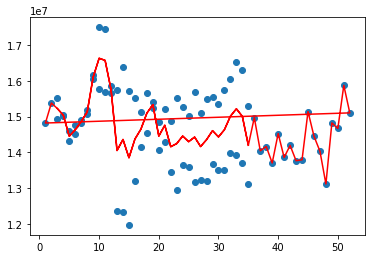

In [149]:
plt.scatter(X['Week_of_Year'], y)
plt.plot(X['Week_of_Year'], predictions, color='red')

In [150]:
### This graph and R2 shows that we can only predict the sales based on what week of the year with a 12 % accuracy. 

In [151]:
## Re Running for Makeup as it is the second largest to 

In [152]:
X = makeup_df['Makeup'].to_frame()

In [153]:
# Generate a column with the week of the year
X['Week_of_Year'] = X.index.weekofyear
X.head()

<ipython-input-153-0d8505e88685>:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  X['Week_of_Year'] = X.index.weekofyear


,Makeup,Week_of_Year
2019-01-12,7188663,2
2019-01-19,7173238,3
2019-01-26,6851425,4
2019-02-02,6745738,5
2019-02-09,7142905,6


In [154]:
makeup_week=X.copy()

<AxesSubplot:xlabel='Week_of_Year', ylabel='Makeup'>

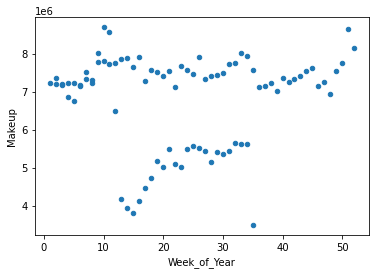

In [155]:
X.plot(x= "Week_of_Year", y="Makeup", kind="scatter")

In [156]:
X_binary_encoded = pd.get_dummies(X, columns=['Week_of_Year'])
X_binary_encoded = X_binary_encoded.drop('Makeup', axis=1)

In [157]:
y = makeup_df['Makeup'].copy()

In [158]:
# Create the Linear Regression model
model = LinearRegression()

# Fit the model to the data (Train the model)
model.fit(X_binary_encoded, y)

# Predict the sales using the week of the year as inputs
predictions = model.predict(X_binary_encoded)

In [159]:
from sklearn.metrics import mean_squared_error, r2_score

# The default scoring method is the R2 score
score = model.score(X_binary_encoded, y)
r2 = r2_score(y, predictions)

print(f"Score: {score}, r2: {r2}")

Score: 0.3141121223355783, r2: 0.3141121223355783


In [160]:
# Mean Squared Error
mse = mean_squared_error(y, predictions)
mse

1002653254187.6979

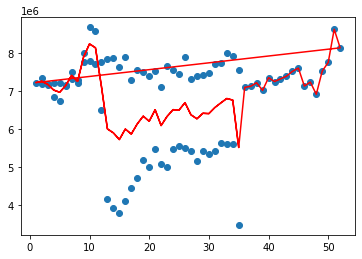

In [161]:
plt.scatter(X['Week_of_Year'], y)
plt.plot(X['Week_of_Year'], predictions, color='red')

In [162]:
## Now trying Lotion data

In [163]:
X = lotion_df['Lotion'].to_frame()


In [164]:
# Generate a column with the week of the year
X['Week_of_Year'] = X.index.weekofyear
X.head()

<ipython-input-164-0d8505e88685>:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  X['Week_of_Year'] = X.index.weekofyear


,Lotion,Week_of_Year
2019-01-12,3551875,2
2019-01-19,3435812,3
2019-01-26,3406859,4
2019-02-02,3754491,5
2019-02-09,3488703,6


<AxesSubplot:xlabel='Week_of_Year', ylabel='Lotion'>

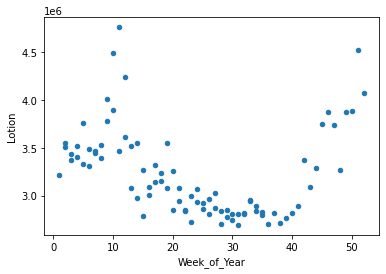

In [165]:
X.plot(x= "Week_of_Year", y="Lotion", kind="scatter")

In [166]:
# Binary encode the weekly column to use as new input features for the model
X_binary_encoded = pd.get_dummies(X, columns=['Week_of_Year'])
X_binary_encoded.head()

,Lotion,Week_of_Year_1,Week_of_Year_2,Week_of_Year_3,Week_of_Year_4,Week_of_Year_5,Week_of_Year_6,Week_of_Year_7,Week_of_Year_8,Week_of_Year_9,...,Week_of_Year_43,Week_of_Year_44,Week_of_Year_45,Week_of_Year_46,Week_of_Year_47,Week_of_Year_48,Week_of_Year_49,Week_of_Year_50,Week_of_Year_51,Week_of_Year_52
2019-01-12,3551875,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-19,3435812,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-26,3406859,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-02-02,3754491,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-02-09,3488703,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [167]:
# The Acne Sales column must be deleted from the input features
X_binary_encoded = X_binary_encoded.drop("Lotion", axis=1)


In [168]:
y = lotion_df['Lotion'].copy()

In [169]:
# Create the Linear Regression model
model = LinearRegression()

# Fit the model to the data (Train the model)
model.fit(X_binary_encoded, y)

# Predict the sales using the week of the year as inputs
predictions = model.predict(X_binary_encoded)

In [170]:
from sklearn.metrics import mean_squared_error, r2_score

# The default scoring method is the R2 score
score = model.score(X_binary_encoded, y)
r2 = r2_score(y, predictions)

print(f"Score: {score}, r2: {r2}")

Score: 0.8851618819778491, r2: 0.8851618819778491


In [171]:
# Mean Squared Error
mse = mean_squared_error(y, predictions)
mse

23938264258.56396

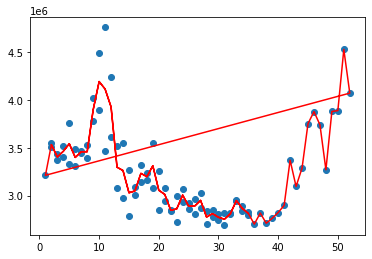

In [172]:
plt.scatter(X['Week_of_Year'], y)
plt.plot(X['Week_of_Year'], predictions, color='red')

In [173]:
## The Lotion was the strongest model with 84% model fit for having the week predict the sales outcome

In [174]:
### Now trying to determine if promos effect sales using A/B Testing ###


In [175]:
### Code below implementeed from https://harvard-iacs.github.io/2018-CS109A/lectures/lecture-23/demo/ ###

In [176]:
# H(NULL)=The Promos have no effect on sales
# H1== Promos have an effect on sales price

In [177]:
## ACNE TEST

In [178]:
acne_df=acne_df.astype(int)
acne_df1=acne_df.dropna()

In [179]:
#creating the sales and promo measures for each group
controlgroup = acne_df1['Acne'][acne_df1['acne_promo']==0]
trt1group = acne_df1['Acne'][acne_df1['acne_promo']==1]


In [180]:

# The two-sample t-test is used to test whether the unknown means of two groups are equal or not.

In [181]:
#two sample t-test testing promo and non promo group
sp.stats.ttest_ind(controlgroup,trt1group)

Ttest_indResult(statistic=1.7176035531402944, pvalue=0.08959796000148233)

In [182]:
#ANOVA F-test
sp.stats.f_oneway(controlgroup,trt1group)

F_onewayResult(statistic=2.9501619657601736, pvalue=0.08959796000148157)

In [183]:
## P <.05 so we reject the NULL Hyptohesis and conclude that promos are affecting sales performance. 

In [184]:
##insert graph here

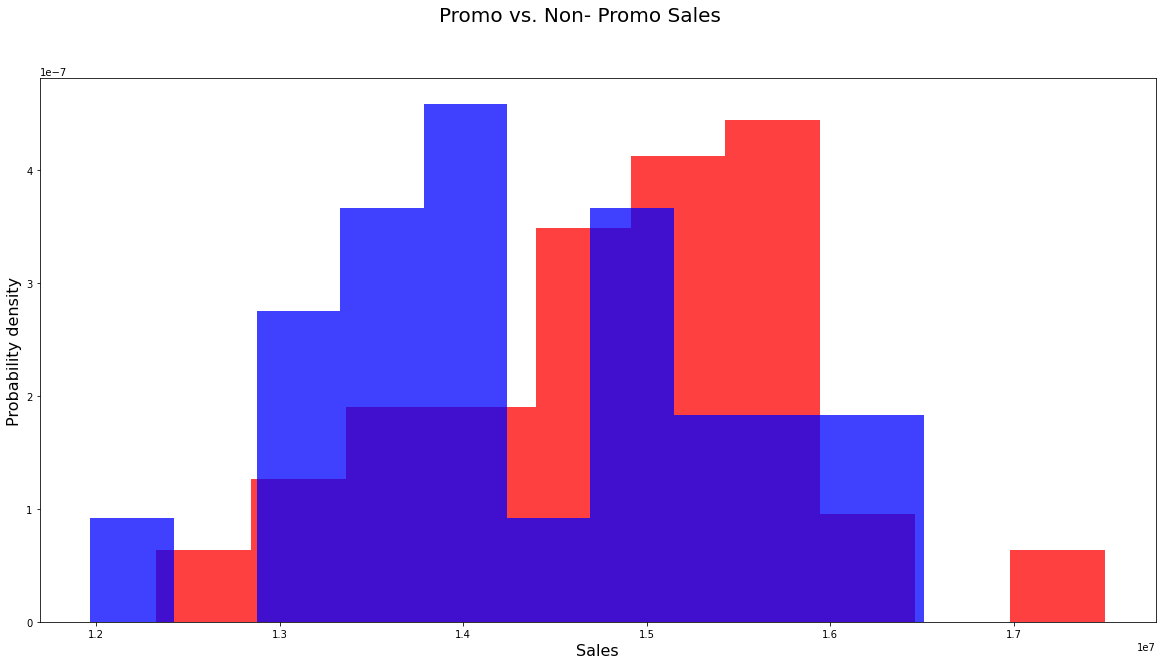

In [185]:
fig = plt.figure(figsize= (20, 10))
ax = fig.add_subplot(111)


p_bp_male = plt.hist(acne_df1['Acne'][acne_df1['acne_promo']==0], label= "Non-Promos",color="red",
                     density= True,
                     alpha=0.75)
p_bp_female = plt.hist(acne_df1['Acne'][acne_df1['acne_promo']==1], label= "Promos",color="blue",
                       density= True,
                       alpha=0.75)


plt.suptitle("Promo vs. Non- Promo Sales", fontsize= 20)
plt.xlabel("Sales", fontsize= 16)
plt.ylabel("Probability density", fontsize= 16)



plt.show()


In [186]:
##Using Makeup

In [187]:
#creating the sales and promo measures for each group
controlgroup = makeup_df['Makeup'][makeup_df['makeup_promo']==0]
trt1group = makeup_df['Makeup'][makeup_df['makeup_promo']==1]


In [188]:
#two sample t-test testing promo and non promo group
sp.stats.ttest_ind(controlgroup,trt1group)

Ttest_indResult(statistic=9.230482222533691, pvalue=2.038730579778468e-14)

In [189]:
#ANOVA F-test
sp.stats.f_oneway(controlgroup,trt1group)

F_onewayResult(statistic=85.20180206051043, pvalue=2.0387305797785047e-14)

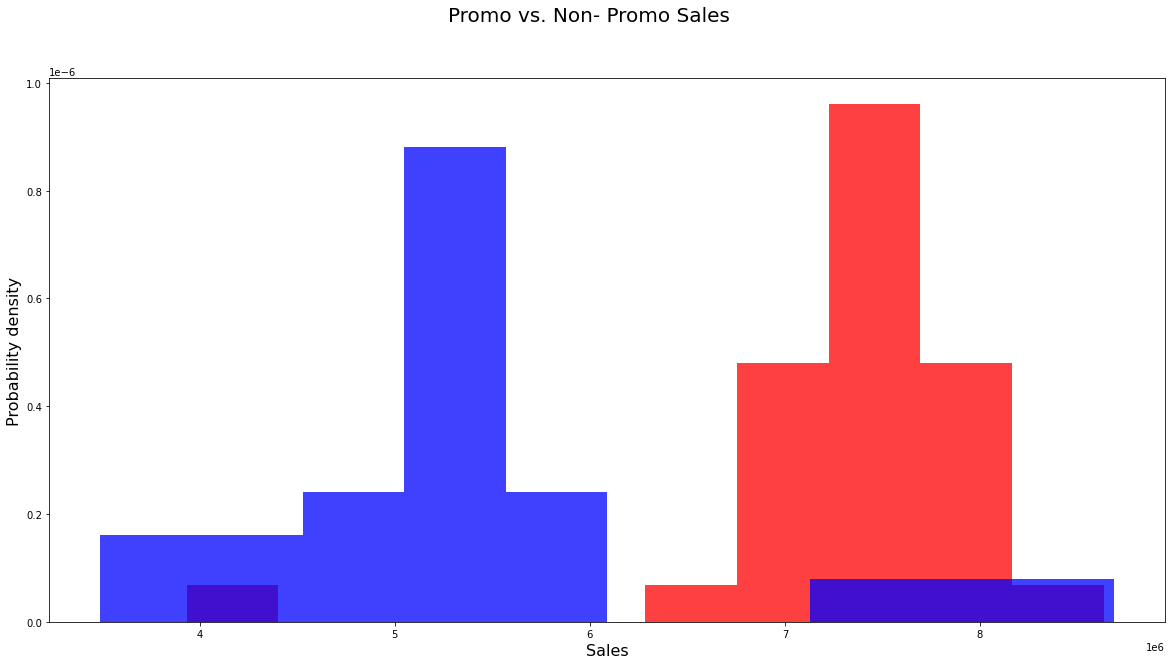

In [190]:
fig = plt.figure(figsize= (20, 10))
ax = fig.add_subplot(111)


p_bp_male = plt.hist(makeup_df['Makeup'][makeup_df['makeup_promo']==0], label= "Non-Promos",color="red",
                     density= True,
                     alpha=0.75)
p_bp_female = plt.hist(makeup_df['Makeup'][makeup_df['makeup_promo']==1], label= "Promos",color="blue",
                       density= True,
                       alpha=0.75)


plt.suptitle("Promo vs. Non- Promo Sales", fontsize= 20)
plt.xlabel("Sales", fontsize= 16)
plt.ylabel("Probability density", fontsize= 16)



plt.show()

In [191]:
## Using Lotion

In [192]:
#creating the sales and promo measures for each group
controlgroup = lotion_df['Lotion'][lotion_df['lotion_promo']==0]
trt1group = lotion_df['Lotion'][lotion_df['lotion_promo']==1]


In [193]:
#two sample t-test testing promo and non promo group
sp.stats.ttest_ind(controlgroup,trt1group)

Ttest_indResult(statistic=-1.6870489949189498, pvalue=0.09530436726594935)

In [194]:
#ANOVA F-test
sp.stats.f_oneway(controlgroup,trt1group)

F_onewayResult(statistic=2.8461343112570394, pvalue=0.09530436726594926)

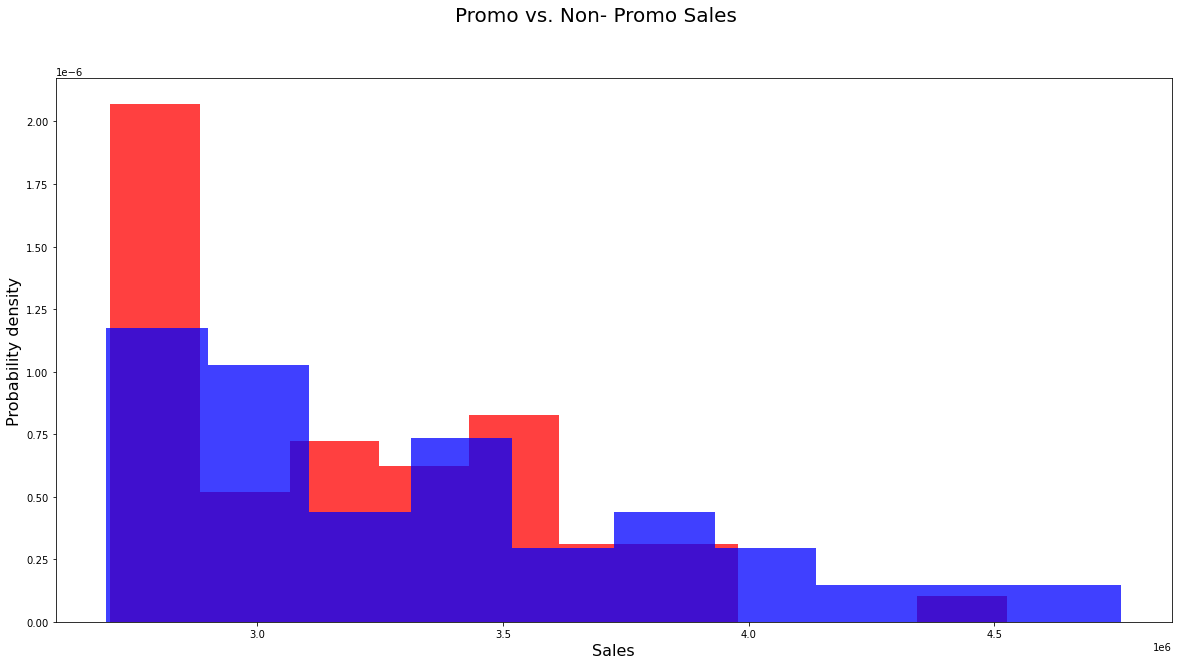

In [195]:
fig = plt.figure(figsize= (20, 10))
ax = fig.add_subplot(111)


p_bp_male = plt.hist(lotion_df['Lotion'][lotion_df['lotion_promo']==0], label= "Non-Promos",color="red",
                     density= True,
                     alpha=0.75)
p_bp_female = plt.hist(lotion_df['Lotion'][lotion_df['lotion_promo']==1], label= "Promos",color="blue",
                       density= True,
                       alpha=0.75)


plt.suptitle("Promo vs. Non- Promo Sales", fontsize= 20)
plt.xlabel("Sales", fontsize= 16)
plt.ylabel("Probability density", fontsize= 16)



plt.show()

In [196]:
## Running SVR Prediction on Acne Sales prices

In [197]:
acne_df

Date,Acne,acne_promo,returns
2019-01-19,15522357,0,0
2019-01-26,15054219,0,0
2019-02-02,14585357,0,0
2019-02-09,14753443,0,0
2019-02-16,14809032,0,0
...,...,...,...
2020-08-01,13517117,0,0
2020-08-08,13979460,0,0
2020-08-15,13920768,0,0
2020-08-22,13697476,0,0


In [198]:

X = acne_df.iloc[:,0].values     
y = acne_df.iloc[:,1].values        

In [199]:
# split the dataset into test set and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [200]:
X_train[:3]
# some features are big in scale, so adjust the scale

array([14161737, 15250643, 13113913])

In [201]:
 X_train= X_train.reshape(-1,1)
 y_train= y_train.reshape(-1,1)
 X_test = X_test.reshape(-1,1)

In [202]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [203]:
# PAY ATTENTION, WE ARE IMPORTING SVR, WHICH IS FOR REGRESSION
from sklearn.svm import SVR

In [204]:
regressor = SVR(kernel = 'rbf') # using rbf kernel
# also, we here call it a regressor, since it is a regression

# in SVC = support vector classification, many name it as a classifier

In [205]:
regressor.fit(X_train, y_train)

C:\Users\wilbr\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [206]:
predictions = regressor.predict(X_test)

In [207]:
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
rmse

0.454934835143398

In [208]:
r2_score(y_test,predictions)

-0.15025170233824547

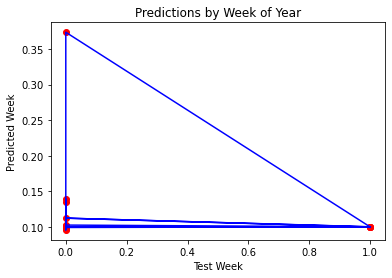

In [209]:
# Visualising the Regression results
plt.scatter(y_test, predictions, color = 'red')
plt.plot(y_test, predictions, color = 'blue')
plt.title('Predictions by Week of Year')
plt.xlabel('Test Week')
plt.ylabel('Predicted Week')
plt.show()

In [210]:
## Outsput shows that the model is only 8.2% accurate in prediction. 

In [211]:
##Using Makeup

In [212]:
makeup_df.head()

Date,Makeup,makeup_promo,returns
2019-01-12,7188663,0,0.004472
2019-01-19,7173238,0,-0.002146
2019-01-26,6851425,0,-0.044863
2019-02-02,6745738,0,-0.015426
2019-02-09,7142905,0,0.058877


In [213]:
makeup_df.drop(columns="makeup_promo")

Date,Makeup,returns
2019-01-12,7188663,0.004472
2019-01-19,7173238,-0.002146
2019-01-26,6851425,-0.044863
2019-02-02,6745738,-0.015426
2019-02-09,7142905,0.058877
...,...,...
2020-08-01,5422756,0.012694
2020-08-08,5647887,0.041516
2020-08-15,5619787,-0.004975
2020-08-22,5622940,0.000561


In [214]:
makeup_df['Week'] = makeup_df.index.weekofyear

<ipython-input-214-17e265cee42f>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  makeup_df['Week'] = makeup_df.index.weekofyear
<ipython-input-214-17e265cee42f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  makeup_df['Week'] = makeup_df.index.weekofyear


In [215]:
makeup_df.head()

Date,Makeup,makeup_promo,returns,Week
2019-01-12,7188663,0,0.004472,2
2019-01-19,7173238,0,-0.002146,3
2019-01-26,6851425,0,-0.044863,4
2019-02-02,6745738,0,-0.015426,5
2019-02-09,7142905,0,0.058877,6


In [216]:
makeup_df.drop(columns="makeup_promo")

Date,Makeup,returns,Week
2019-01-12,7188663,0.004472,2
2019-01-19,7173238,-0.002146,3
2019-01-26,6851425,-0.044863,4
2019-02-02,6745738,-0.015426,5
2019-02-09,7142905,0.058877,6
...,...,...,...
2020-08-01,5422756,0.012694,31
2020-08-08,5647887,0.041516,32
2020-08-15,5619787,-0.004975,33
2020-08-22,5622940,0.000561,34


In [217]:

X = makeup_df.iloc[:,0].values     
y = makeup_df.iloc[:,1].values        

In [218]:
# split the dataset into test set and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [219]:
X_train[:3]
# some features are big in scale, so adjust the scale

array([4725568, 7246328, 7549323], dtype=object)

In [220]:
X_train= X_train.reshape(-1,1)
y_train= y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [221]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [222]:
# PAY ATTENTION, WE ARE IMPORTING SVR, WHICH IS FOR REGRESSION
from sklearn.svm import SVR

In [223]:
regressor = SVR(kernel = 'rbf') # using rbf kernel
# also, we here call it a regressor, since it is a regression

# in SVC = support vector classification, many name it as a classifier

In [224]:
regressor.fit(X_train, y_train)

C:\Users\wilbr\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [225]:
predictions = regressor.predict(X_test)

In [226]:
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
rmse

0.3207198507356938

In [227]:
r2_score(y_test,predictions)

0.5371244980483343

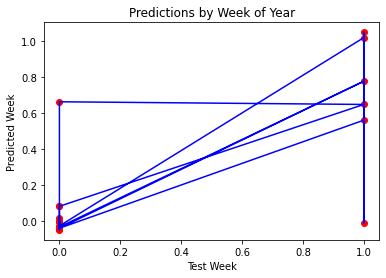

In [228]:
# Visualising the Regression results
plt.scatter(y_test, predictions, color = 'red')
plt.plot(y_test, predictions, color = 'blue')
plt.title('Predictions by Week of Year')
plt.xlabel('Test Week')
plt.ylabel('Predicted Week')
plt.show()

In [229]:
## Using Lotion

In [230]:
lotion_df['Week'] = makeup_df.index.weekofyear

<ipython-input-230-ddc723731459>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  lotion_df['Week'] = makeup_df.index.weekofyear


In [231]:
lotion_df.head()

Date,Lotion,lotion_promo,returns,Week
2019-01-12,3551875,0,0.100392,2
2019-01-19,3435812,0,-0.032677,3
2019-01-26,3406859,0,-0.008427,4
2019-02-02,3754491,0,0.102039,5
2019-02-09,3488703,0,-0.070792,6


In [232]:
lotion_df.drop(columns="lotion_promo")

Date,Lotion,returns,Week
2019-01-12,3551875,0.100392,2
2019-01-19,3435812,-0.032677,3
2019-01-26,3406859,-0.008427,4
2019-02-02,3754491,0.102039,5
2019-02-09,3488703,-0.070792,6
...,...,...,...
2020-08-01,2693439,-0.017773,31
2020-08-08,2804635,0.041284,32
2020-08-15,2944624,0.049913,33
2020-08-22,2894137,-0.017145,34


In [233]:
X = lotion_df.iloc[:,0].values     
y = lotion_df.iloc[:,1].values        

In [234]:
# split the dataset into test set and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [235]:
X_train[:3]

array([3236759, 3739085, 2941523])

In [236]:
X_train= X_train.reshape(-1,1)
y_train= y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [237]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [238]:
from sklearn.svm import SVR


In [239]:
regressor = SVR(kernel = 'rbf')

In [240]:
regressor.fit(X_train, y_train)

C:\Users\wilbr\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [241]:
predictions = regressor.predict(X_test)

In [242]:
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
rmse

0.6957659523172272

In [243]:
r2_score(y_test,predictions)

-1.0369512255956232

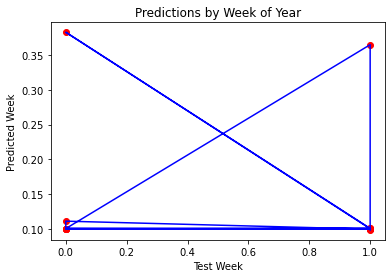

In [244]:
# Visualising the Regression results
plt.scatter(y_test, predictions, color = 'red')
plt.plot(y_test, predictions, color = 'blue')
plt.title('Predictions by Week of Year')
plt.xlabel('Test Week')
plt.ylabel('Predicted Week')
plt.show()

In [245]:
###LTSM Predictions  Acne

In [246]:

df=acne_df.copy()

In [247]:
# This function accepts the column number for the features (X) and the target (y)
# It chunks the data up with a rolling window of Xt-n to predict Xt
# It returns a numpy array of X any y
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i:(i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [248]:
# Predict Closing Prices using a 10 day window of previous closing prices

window_size = 6
# Column index 0 is the 'fng_value' column
# Column index 1 is the `Close` column
feature_column = 1
target_column = 0
X, y = window_data(df, window_size, feature_column, target_column)

In [249]:

# Use 70% of the data for training and the remaineder for testing
from sklearn.model_selection import train_test_split

split = int(0.7 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]

In [250]:
from sklearn.preprocessing import MinMaxScaler
# Use the MinMaxScaler to scale data between 0 and 1.
scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [251]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [252]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [253]:
# Build the LSTM model. 

In [254]:
model = Sequential()

number_units = 5 # The number of units in each LSTM layer, is equal to the size of the time window
dropout_fraction = 0.2 # fraction of nodes that will be dropped on each epoch. randomly drop 20% of the units.

# Model set-up
number_input_features = 20
hidden_nodes_layer1 = 5
hidden_nodes_layer2 = 5


# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))


In [255]:
# Compile the model
model.compile(optimizer="adam", loss = "mean_squared_error")

In [256]:
# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 6, 5)              140       
_________________________________________________________________
dropout (Dropout)            (None, 6, 5)              0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 6, 5)              220       
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 5)              0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 5)                 220       
_________________________________________________________________
dropout_2 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense (Dense)                (None, 1)                 6

In [257]:
# Train the model


model.fit(X_train, y_train, epochs =10, shuffle = False, batch_size=1, verbose=1 ) 

Epoch 1/10
54/54 [==============================] - 5s 6ms/step - loss: 0.2271
Epoch 2/10
54/54 [==============================] - 0s 6ms/step - loss: 0.0698
Epoch 3/10
54/54 [==============================] - 0s 7ms/step - loss: 0.0561
Epoch 4/10
54/54 [==============================] - 0s 6ms/step - loss: 0.0500
Epoch 5/10
54/54 [==============================] - 0s 6ms/step - loss: 0.0411
Epoch 6/10
54/54 [==============================] - 0s 6ms/step - loss: 0.0263
Epoch 7/10
54/54 [==============================] - 0s 6ms/step - loss: 0.0330
Epoch 8/10
54/54 [==============================] - 0s 6ms/step - loss: 0.0242
Epoch 9/10
54/54 [==============================] - 0s 6ms/step - loss: 0.0242
Epoch 10/10
54/54 [==============================] - 0s 6ms/step - loss: 0.0366


In [258]:
# Evaluate the model
model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 1s/step - loss: 0.0721


0.0720641240477562

In [259]:
# Make some predictions
predicted= model.predict(X_test)

In [260]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [261]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real Sales": real_prices.ravel(),
    "Predicted Sales": predicted_prices.ravel()
}, index = df.index[-len(real_prices): ]) 
stocks.head()

,Real Sales,Predicted Sales
2020-03-21,17445158.0,15126086.0
2020-03-28,15644868.0,15126086.0
2020-04-04,12345392.0,15126086.0
2020-04-11,12329168.0,15126086.0
2020-04-18,11968714.0,15126086.0


<AxesSubplot:>

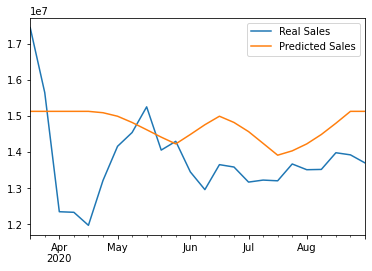

In [262]:
stocks.plot()  ## Acne

In [263]:
##Testing with Lotion

In [264]:
df=lotion_df

In [265]:
window_size = 6
# Column index 0 is the 'fng_value' column
# Column index 1 is the `Close` column
feature_column = 1
target_column = 0
X, y = window_data(df, window_size, feature_column, target_column)

In [266]:
from sklearn.model_selection import train_test_split

split = int(0.7 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]

In [267]:
scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [268]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [269]:
model = Sequential()

number_units = 5 # The number of units in each LSTM layer, is equal to the size of the time window
dropout_fraction = 0.2 # fraction of nodes that will be dropped on each epoch. randomly drop 20% of the units.

# Model set-up
number_input_features = 20
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 10


# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))


In [270]:
# Compile the model
model.compile(optimizer="adam", loss = "mean_squared_error")

In [271]:
# Summarize the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 6, 5)              140       
_________________________________________________________________
dropout_3 (Dropout)          (None, 6, 5)              0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 6, 5)              220       
_________________________________________________________________
dropout_4 (Dropout)          (None, 6, 5)              0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 5)                 220       
_________________________________________________________________
dropout_5 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [272]:


model.fit(X_train, y_train, epochs =10, shuffle = False, batch_size=1, verbose=1 ) 

Epoch 1/10
55/55 [==============================] - 4s 4ms/step - loss: 0.0736
Epoch 2/10
55/55 [==============================] - 0s 4ms/step - loss: 0.0420
Epoch 3/10
55/55 [==============================] - 0s 4ms/step - loss: 0.0439
Epoch 4/10
55/55 [==============================] - 0s 4ms/step - loss: 0.0531
Epoch 5/10
55/55 [==============================] - 0s 4ms/step - loss: 0.0378
Epoch 6/10
55/55 [==============================] - 0s 4ms/step - loss: 0.0429
Epoch 7/10
55/55 [==============================] - 0s 5ms/step - loss: 0.0352
Epoch 8/10
55/55 [==============================] - 0s 5ms/step - loss: 0.0397
Epoch 9/10
55/55 [==============================] - 0s 6ms/step - loss: 0.0450
Epoch 10/10
55/55 [==============================] - 0s 6ms/step - loss: 0.0416


In [273]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 2s 2s/step - loss: 0.0920


0.0920189693570137

In [274]:
predicted= model.predict(X_test)

In [275]:
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [276]:
stocks = pd.DataFrame({
    "Real Sales": real_prices.ravel(),
    "Predicted Sales": predicted_prices.ravel()
}, index = df.index[-len(real_prices): ]) 
stocks.head()

,Real Sales,Predicted Sales
2020-03-21,4757300.0,3202559.75
2020-03-28,4236845.0,3343599.50
2020-04-04,3077724.0,3514601.75
2020-04-11,2974870.0,3701443.00
2020-04-18,2788166.0,3701443.00


<AxesSubplot:>

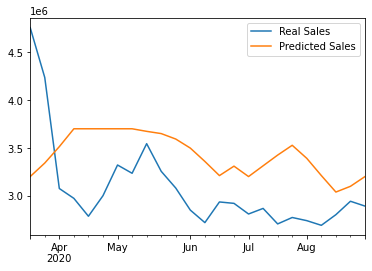

In [277]:
stocks.plot()  ## Lotion Pred vs Actual